PROBLEM STATEMENT

The accurate classification of skin lesions, distinguishing between benign and malignant cases, plays a crucial role in early detection and effective treatment of skin cancer. However, many regions face challenges due to the lack of specialized expertise and advanced diagnostic tools, which can delay proper diagnosis. This project aims to address these challenges by developing an Artificial Intelligence (AI) model designed to accurately classify skin lesions as either benign or malignant. By utilizing deep learning techniques, the model can learn from vast datasets of labeled images, identifying patterns that might be missed by the human eye. Additionally, the project focuses on creating a user-friendly interface, ensuring accessibility for healthcare providers and individuals, even in areas with limited access to specialists. The goal is to provide a powerful tool for early diagnosis, improving patient outcomes and contributing to the reduction of skin cancer-related mortality.



Importing Libraries

In [9]:
!pip install pillow

In [10]:
# Install required libraries
!pip install Pillow matplotlib numpy seaborn pandas
# Install required libraries for image processing and plotting
!pip install scikit-image matplotlib numpy scikit-learn
!pip install imagehash Pillow


In [ ]:
!pip install tqdm

In [7]:
import os

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import pandas as pd
from skimage import io, feature
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm



Defining Paths to Dataset

In [3]:
# Define paths to your dataset
train_dir = r'C:\Users\91812\Downloads\archive (1) (1)\melanoma_cancer_dataset\train'
test_dir = r"C:\Users\91812\Downloads\archive (1) (1)\melanoma_cancer_dataset\test"

Function to Count Images


In [4]:
# Function to count images in malignant and benign folders
def count_images_in_directory(directory):
    malignant_dir = os.path.join(directory, 'malignant')
    benign_dir = os.path.join(directory, 'benign')

    num_malignant = len(os.listdir(malignant_dir))
    num_benign = len(os.listdir(benign_dir))

    print(f"Number of malignant images {num_malignant}")
    print(f"Number of benign images  {num_benign}")
# Counting the images in train and test directories
count_images_in_directory(train_dir)
count_images_in_directory(test_dir)


Number of malignant images 4605
Number of benign images  5000
Number of malignant images 500
Number of benign images  500


Image Modes Count

In [5]:
import os
from PIL import Image

def count_image_modes(directory):
    malignant_dir = os.path.join(directory, 'malignant')
    benign_dir = os.path.join(directory, 'benign')

    mode_counts = {
        "malignant": {"grayscale": 0, "RGB": 0},
        "benign": {"grayscale": 0, "RGB": 0}
    }

    # Count mode of malignant images
    for img_name in os.listdir(malignant_dir):
        img_path = os.path.join(malignant_dir, img_name)
        with Image.open(img_path) as img:
            if img.mode == 'L':  # 'L' mode represents grayscale images
                mode_counts["malignant"]["grayscale"] += 1
            elif img.mode == 'RGB':
                mode_counts["malignant"]["RGB"] += 1

    # Count mode of benign images
    for img_name in os.listdir(benign_dir):
        img_path = os.path.join(benign_dir, img_name)
        with Image.open(img_path) as img:
            if img.mode == 'L':  # 'L' mode represents grayscale images
                mode_counts["benign"]["grayscale"] += 1
            elif img.mode == 'RGB':
                mode_counts["benign"]["RGB"] += 1

    print("Malignant image mode counts:", mode_counts["malignant"])
    print("Benign image mode counts:", mode_counts["benign"])

    return mode_counts

# Replace 'train_dir' with the actual path to your training dataset directory
train_dir = r'C:\Users\91812\Downloads\archive (1) (1)\melanoma_cancer_dataset\train'
train_image_mode_counts = count_image_modes(train_dir)


Malignant image mode counts: {'grayscale': 0, 'RGB': 4605}
Benign image mode counts: {'grayscale': 0, 'RGB': 5000}


Class Distribution of Malignant and Benign images

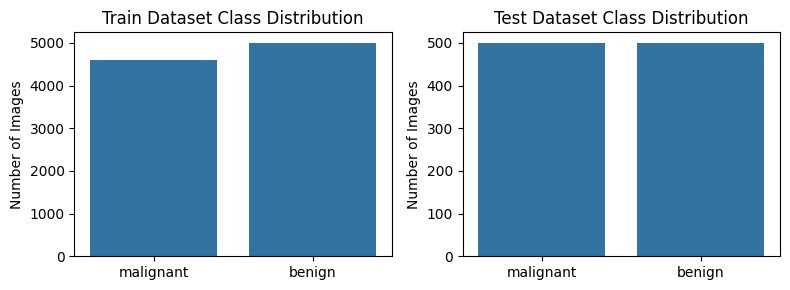

In [6]:
# Function to count images in each class
def count_images(directory):
    malignant_dir = os.path.join(directory, 'malignant')
    benign_dir = os.path.join(directory, 'benign')

    malignant_count = len(os.listdir(malignant_dir))
    benign_count = len(os.listdir(benign_dir))

    return {'malignant': malignant_count, 'benign': benign_count}

# Count images in train and test datasets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Visualize the class distribution side by side for train and test datasets
def plot_class_distribution_side_by_side(train_counts, test_counts):
    labels = list(train_counts.keys())

    # Creating a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Plot for train dataset
    sns.barplot(x=labels, y=list(train_counts.values()), ax=axes[0])
    axes[0].set_title('Train Dataset Class Distribution')
    axes[0].set_ylabel('Number of Images')

    # Plot for test dataset
    sns.barplot(x=labels, y=list(test_counts.values()), ax=axes[1])
    axes[1].set_title('Test Dataset Class Distribution')
    axes[1].set_ylabel('Number of Images')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot side by side
plot_class_distribution_side_by_side(train_counts, test_counts)


Displaying Some Sample Images

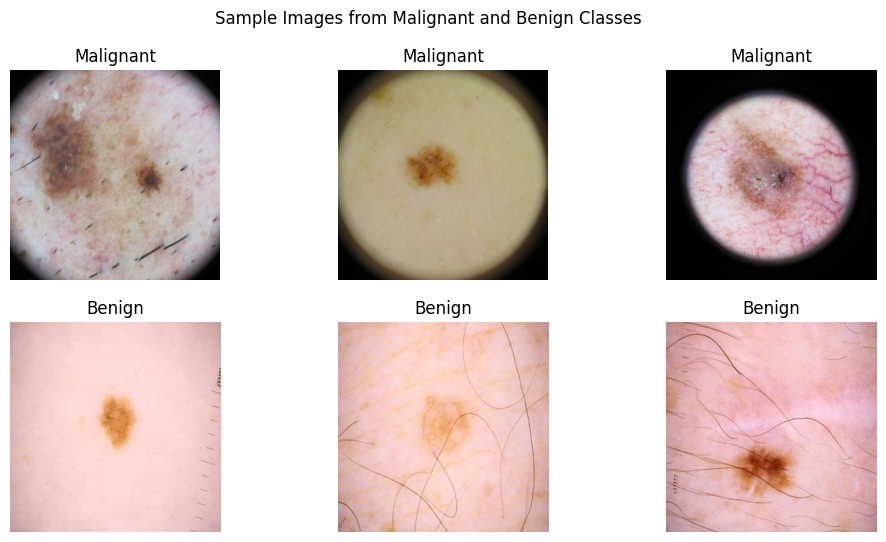

In [7]:
# Function to display random sample images from malignant and benign classes
def visualize_sample_images(directory, num_samples=3):
    malignant_dir = os.path.join(directory, 'malignant')
    benign_dir = os.path.join(directory, 'benign')

    fig, ax = plt.subplots(2, num_samples, figsize=(12, 6))
    fig.suptitle('Sample Images from Malignant and Benign Classes')

    # Malignant samples
    malignant_samples = os.listdir(malignant_dir)[:num_samples]
    for i, img_name in enumerate(malignant_samples):
        img_path = os.path.join(malignant_dir, img_name)
        img = Image.open(img_path)
        ax[0, i].imshow(img)
        ax[0, i].set_title('Malignant')
        ax[0, i].axis('off')

    # Benign samples
    benign_samples = os.listdir(benign_dir)[:num_samples]
    for i, img_name in enumerate(benign_samples):
        img_path = os.path.join(benign_dir, img_name)
        img = Image.open(img_path)
        ax[1, i].imshow(img)
        ax[1, i].set_title('Benign')
        ax[1, i].axis('off')

    plt.show()

# Visualize sample images from train dataset
visualize_sample_images(train_dir)


Mean Pixel Intensity of Images

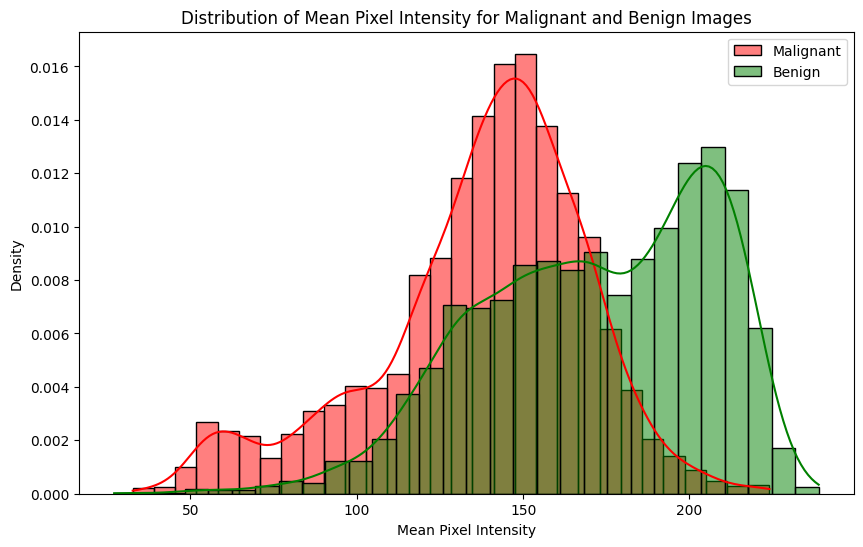

In [8]:

# Since we are working with image data, we'll calculate basic image statistics and explore correlation.
# This will include mean pixel intensity for each image.

# Function to compute basic statistics (mean pixel intensity)
def compute_image_statistics(directory):
    malignant_dir = os.path.join(directory, 'malignant')
    benign_dir = os.path.join(directory, 'benign')

    malignant_stats = []
    benign_stats = []

    # Malignant image statistics
    for img_name in os.listdir(malignant_dir):
        img_path = os.path.join(malignant_dir, img_name)
        img = np.array(Image.open(img_path))
        malignant_stats.append(np.mean(img))

    # Benign image statistics
    for img_name in os.listdir(benign_dir):
        img_path = os.path.join(benign_dir, img_name)
        img = np.array(Image.open(img_path))
        benign_stats.append(np.mean(img))

    return {'malignant': malignant_stats, 'benign': benign_stats}

# Compute statistics for train dataset
train_image_stats = compute_image_statistics(train_dir)

# Visualize the distribution of pixel intensity statistics
def plot_image_statistics(image_stats, stat_type='Mean Pixel Intensity'):
    malignant_stats = image_stats['malignant']
    benign_stats = image_stats['benign']

    plt.figure(figsize=(10, 6))
    sns.histplot(malignant_stats, label='Malignant', color='r', kde=True, stat="density", bins=30)
    sns.histplot(benign_stats, label='Benign', color='g', kde=True, stat="density", bins=30)

    plt.title(f'Distribution of {stat_type} for Malignant and Benign Images')
    plt.xlabel(stat_type)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot image statistics (mean pixel intensity)
plot_image_statistics(train_image_stats)


Mean Pixel Intensity By Labels

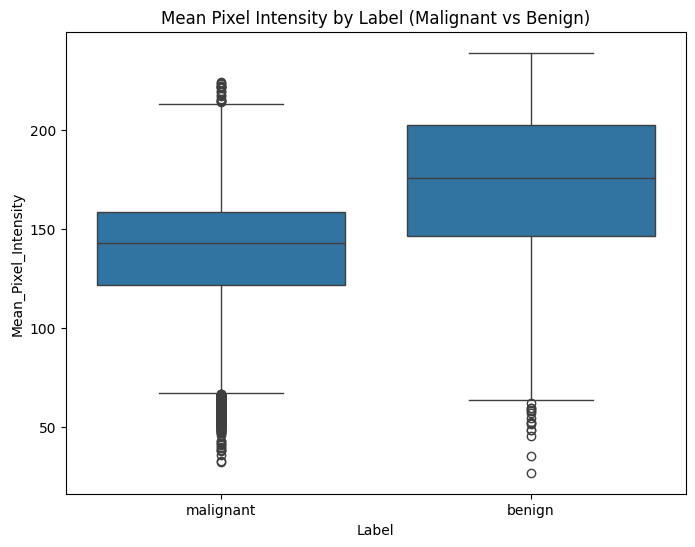

In [9]:
# Correlation analysis between image statistics (mean pixel intensity) and labels
def compute_label_correlation(image_stats):
    labels = ['malignant'] * len(image_stats['malignant']) + ['benign'] * len(image_stats['benign'])
    pixel_means = image_stats['malignant'] + image_stats['benign']

    # Convert to a dataframe for correlation analysis
    import pandas as pd
    df = pd.DataFrame({'Label': labels, 'Mean_Pixel_Intensity': pixel_means})

    # Correlation plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Label', y='Mean_Pixel_Intensity', data=df)
    plt.title('Mean Pixel Intensity by Label (Malignant vs Benign)')
    plt.show()

# Compute and visualize correlation between pixel intensity and labels
compute_label_correlation(train_image_stats)


Image Sharpness 

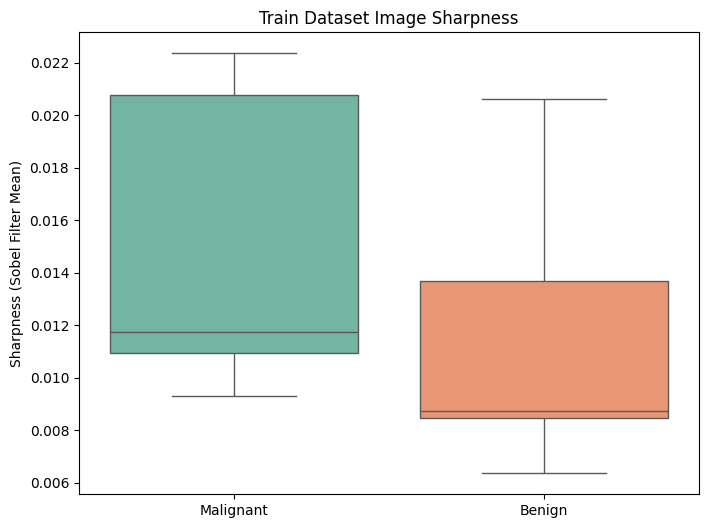

In [10]:
# Explore image characteristics like blurriness, contrast, etc.
from skimage import filters

# Function to analyze image sharpness
def compute_sharpness(directory, num_samples=5):
    malignant_dir = os.path.join(directory, 'malignant')
    benign_dir = os.path.join(directory, 'benign')

    sharpness = {"malignant": [], "benign": []}

    # Malignant image sharpness
    for img_name in os.listdir(malignant_dir)[:num_samples]:
        img_path = os.path.join(malignant_dir, img_name)
        img = np.array(Image.open(img_path).convert('L'))  # Convert to grayscale
        edges = filters.sobel(img)
        sharpness["malignant"].append(edges.mean())

    # Benign image sharpness
    for img_name in os.listdir(benign_dir)[:num_samples]:
        img_path = os.path.join(benign_dir, img_name)
        img = np.array(Image.open(img_path).convert('L'))
        edges = filters.sobel(img)
        sharpness["benign"].append(edges.mean())

    return sharpness

# Compute sharpness of images in train dataset
train_sharpness = compute_sharpness(train_dir)

# Plot sharpness for both classes
def plot_sharpness(sharpness, dataset_type='Train'):
    malignant_sharpness = sharpness['malignant']
    benign_sharpness = sharpness['benign']

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=[malignant_sharpness, benign_sharpness], palette="Set2")
    plt.xticks([0, 1], ['Malignant', 'Benign'])
    plt.title(f'{dataset_type} Dataset Image Sharpness')
    plt.ylabel('Sharpness (Sobel Filter Mean)')
    plt.show()

# Plot sharpness for train dataset
plot_sharpness(train_sharpness)


Heat Map Average Pixel Intensity

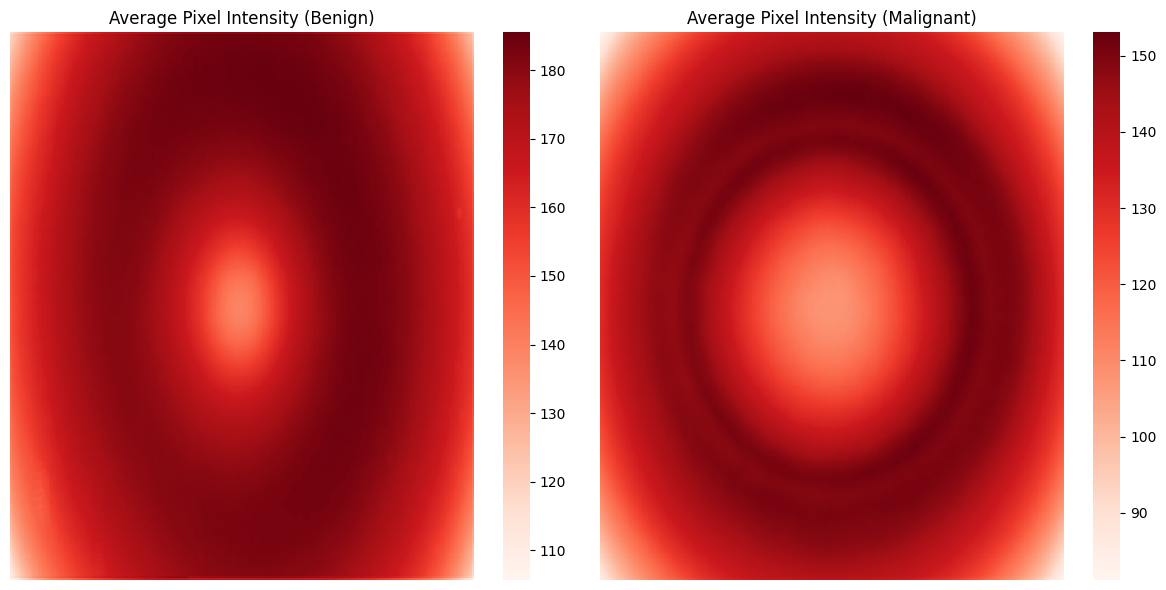

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Function to calculate the average pixel intensity for images in a directory
def calculate_average_pixel_intensity(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return None

    total_intensity = None
    image_count = 0

    for file in os.listdir(directory):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(directory, file)
            try:
                # Load image and convert to grayscale
                img = Image.open(file_path).convert('L')
                img_array = np.array(img)

                if total_intensity is None:
                    total_intensity = np.zeros_like(img_array, dtype=np.float64)

                total_intensity += img_array
                image_count += 1
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    if image_count == 0:
        return None

    # Calculate the average intensity
    average_intensity = total_intensity / image_count
    return average_intensity

# Base directory for the dataset
base_directory = r'C:\Users\91812\Downloads\archive (1) (1)\melanoma_cancer_dataset'

# Define paths for benign and malignant images in the training set
train_benign_directory = os.path.join(base_directory, 'train', 'benign')
train_malignant_directory = os.path.join(base_directory, 'train', 'malignant')

# Calculate average pixel intensities
benign_avg_intensity = calculate_average_pixel_intensity(train_benign_directory)
malignant_avg_intensity = calculate_average_pixel_intensity(train_malignant_directory)

# Plot heatmaps for pixel intensities
plt.figure(figsize=(12, 6))

if benign_avg_intensity is not None:
    plt.subplot(1, 2, 1)
    sns.heatmap(benign_avg_intensity, cmap='Reds')
    plt.title('Average Pixel Intensity (Benign)')
    plt.axis('off')

if malignant_avg_intensity is not None:
    plt.subplot(1, 2, 2)
    sns.heatmap(malignant_avg_intensity, cmap='Reds')
    plt.title('Average Pixel Intensity (Malignant)')
    plt.axis('off')

plt.tight_layout()
plt.show()


Histogram of Hog Features

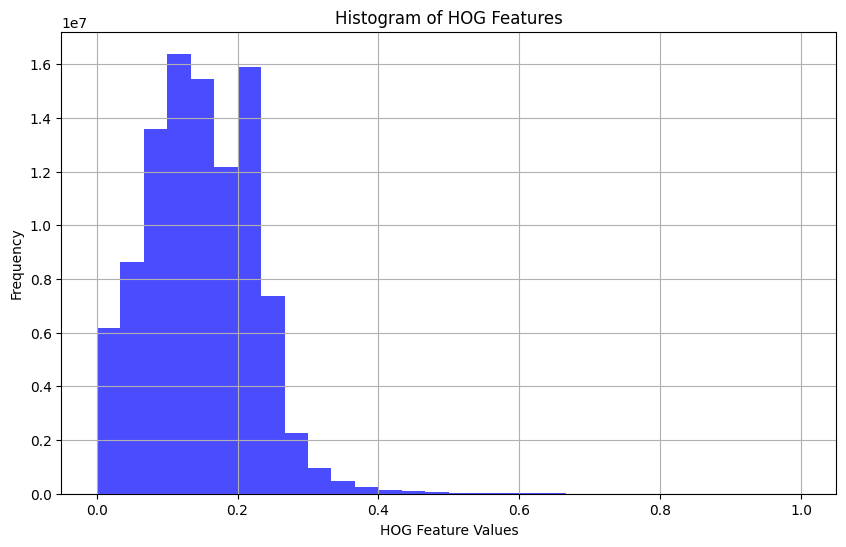

In [14]:
# Function to compute HOG features for all images in a directory
def compute_hog_features(directory):
    hog_features = []

    # Iterate through each sub-directory (malignant and benign)
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)

        # Iterate through each image in the label directory
        if os.path.isdir(label_dir):  # Ensure it's a directory
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)

                # Read the image
                img = io.imread(img_path)

                # Convert to grayscale if it's not already
                if img.ndim == 3:
                    img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])  # Convert to grayscale

                # Compute HOG features
                features, _ = feature.hog(img, pixels_per_cell=(16, 16),
                                           cells_per_block=(2, 2),
                                           visualize=True)
                hog_features.append(features)

    return np.array(hog_features)

# Function to plot histogram of HOG features
def plot_hog_histogram(hog_features):
    # Flatten the HOG features to create a histogram
    flat_hog_features = hog_features.flatten()

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(flat_hog_features, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of HOG Features')
    plt.xlabel('HOG Feature Values')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Define the path to your dataset
dataset_directory = r'C:\Users\91812\Downloads\archive (1) (1)\melanoma_cancer_dataset'

# Compute HOG features for train dataset
train_hog_features = compute_hog_features(os.path.join(dataset_directory, 'train'))

# Plot the histogram of HOG features
plot_hog_histogram(train_hog_features)

Corrupted Images

In [15]:
import os
from PIL import Image

# Function to check if an image is corrupted
def is_image_corrupted(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Check if the image can be opened
        return False  # Image is not corrupted
    except (IOError, SyntaxError) as e:
        print(f"Corrupted image found: {image_path} - {e}")
        return True  # Image is corrupted

# Function to check for corrupted images in a directory
def check_for_corrupted_images(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return 0

    corrupted_count = 0

    # Iterate over all image files in the directory
    for file in os.listdir(directory):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(directory, file)
            if is_image_corrupted(file_path):
                corrupted_count += 1

    return corrupted_count

# Base directory for your dataset
base_directory = r'C:\Users\91812\Downloads\archive (1) (1)\melanoma_cancer_dataset'

# Define paths for benign and malignant images in the training set
train_directory = os.path.join(base_directory, 'train')
benign_directory = os.path.join(train_directory, 'benign')
malignant_directory = os.path.join(train_directory, 'malignant')

# Check for corrupted images in benign directory
benign_corrupted_count = check_for_corrupted_images(benign_directory)
print(f"Number of corrupted images in the 'benign' category: {benign_corrupted_count}")

# Check for corrupted images in malignant directory
malignant_corrupted_count = check_for_corrupted_images(malignant_directory)
print(f"Number of corrupted images in the 'malignant' category: {malignant_corrupted_count}")


Number of corrupted images in the 'benign' category: 0
Number of corrupted images in the 'malignant' category: 0


Indentifying and Removing Duplicates

In [17]:
import os
import imagehash
from PIL import Image
import shutil

def find_and_copy_non_duplicates(dataset_path, new_dataset_path):
    image_hashes = {}
    duplicate_count = 0
    
    # Create the new directory if it doesn't exist
    os.makedirs(new_dataset_path, exist_ok=True)

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            img_path = os.path.join(root, file)
            try:
                # Compute the hash of the image
                img_hash = str(imagehash.phash(Image.open(img_path)))
                
                if img_hash in image_hashes:
                    # If the image hash is a duplicate, increase the count
                    duplicate_count += 1
                else:
                    # If the image hash is unique, store it and copy the image
                    image_hashes[img_hash] = img_path
                    shutil.copy(img_path, os.path.join(new_dataset_path, file))
            except Exception as e:
                print(f"Error processing image: {img_path}, error: {e}")

    # Return the count of duplicate images
    return duplicate_count

# Define original dataset path
original_dataset_path = r'C:\Users\91812\Downloads\archive (1) (1)\melanoma_cancer_dataset'

# Create the new dataset path in the same directory
new_dataset_path = os.path.join(os.path.dirname(original_dataset_path), 'cleaned_melanoma_cancer_dataset')

# Define paths for train and test datasets
train_path = os.path.join(original_dataset_path, 'train')
test_path = os.path.join(original_dataset_path, 'test')

# Define datasets
datasets = [
    (os.path.join(train_path, 'benign'), os.path.join(new_dataset_path, 'train', 'benign'), "train_benign"),
    (os.path.join(train_path, 'malignant'), os.path.join(new_dataset_path, 'train', 'malignant'), "train_malignant"),
    (os.path.join(test_path, 'benign'), os.path.join(new_dataset_path, 'test', 'benign'), "test_benign"),
    (os.path.join(test_path, 'malignant'), os.path.join(new_dataset_path, 'test', 'malignant'), "test_malignant")
]

# Run duplicate detection, copying non-duplicates, and showing duplicate counts
for dataset_path, new_path, dataset_name in datasets:
    duplicate_count = find_and_copy_non_duplicates(dataset_path, new_path)
    print(f"Cleaned images from {dataset_name} copied to {new_path}")
    print(f"Number of duplicate images in {dataset_name}: {duplicate_count}")


Cleaned images from train_benign copied to C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\train\benign
Number of duplicate images in train_benign: 8
Cleaned images from train_malignant copied to C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\train\malignant
Number of duplicate images in train_malignant: 18
Cleaned images from test_benign copied to C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\test\benign
Number of duplicate images in test_benign: 1
Cleaned images from test_malignant copied to C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\test\malignant
Number of duplicate images in test_malignant: 0


Coverting RGB to Grayscale

Sample Images:


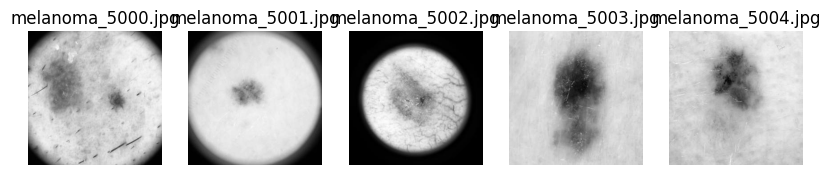

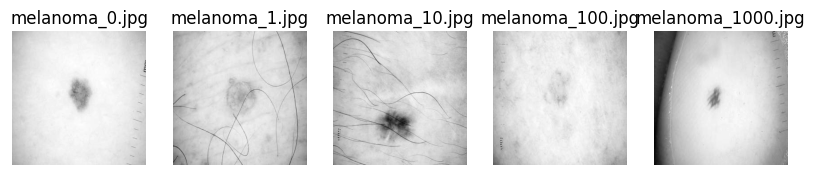

In [55]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def count_and_convert_images_to_grayscale(directory):
    malignant_dir = os.path.join(directory, 'malignant')
    benign_dir = os.path.join(directory, 'benign')
    grayscale_dir = os.path.join(directory, 'grayscale')

    # Create directories for grayscale images of each category
    malignant_grayscale_dir = os.path.join(grayscale_dir, 'malignant')
    benign_grayscale_dir = os.path.join(grayscale_dir, 'benign')

    os.makedirs(malignant_grayscale_dir, exist_ok=True)
    os.makedirs(benign_grayscale_dir, exist_ok=True)

    # Initialize counts
    mode_counts = {
        "malignant": {"grayscale": 0, "RGB": 0},
        "benign": {"grayscale": 0, "RGB": 0}
    }

    # Function to process images in a given category
    def process_images(image_dir, category, grayscale_output_dir):
        for img_name in os.listdir(image_dir):
            img_path = os.path.join(image_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    # Count original mode
                    if img.mode == 'L':  # 'L' mode represents grayscale images
                        mode_counts[category]["grayscale"] += 1
                    elif img.mode == 'RGB':
                        mode_counts[category]["RGB"] += 1

                    # Convert to grayscale and save
                    grayscale_img = img.convert('L')  # Convert to grayscale
                    grayscale_img.save(os.path.join(grayscale_output_dir, img_name))

            except Exception as e:
                print(f"Error processing {img_name}: {e}")

    # Process malignant images
    process_images(malignant_dir, "malignant", malignant_grayscale_dir)

    # Process benign images
    process_images(benign_dir, "benign", benign_grayscale_dir)

    return mode_counts, malignant_grayscale_dir, benign_grayscale_dir

def show_sample_images(directory, num_samples=5):
    # Display a sample of images from the specified directory
    img_names = os.listdir(directory)[:num_samples]
    plt.figure(figsize=(10, 10))

    for i, img_name in enumerate(img_names):
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(img_name)

    plt.show()

# Replace 'train_dir' with the actual path to your training dataset directory
train_dir = r'C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\train'
train_image_mode_counts, malignant_grayscale_dir, benign_grayscale_dir = count_and_convert_images_to_grayscale(train_dir)

# Show sample images for malignant and benign categories
print("Sample Images:")
show_sample_images(malignant_grayscale_dir)

show_sample_images(benign_grayscale_dir)


Checking No of gray scale images

Sample Images from Test Set:


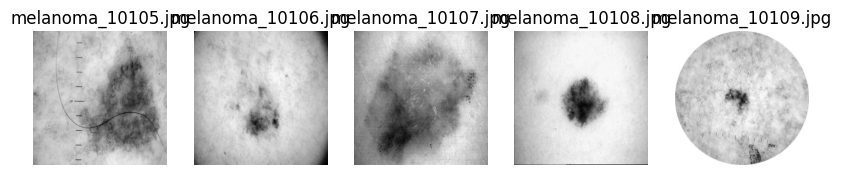

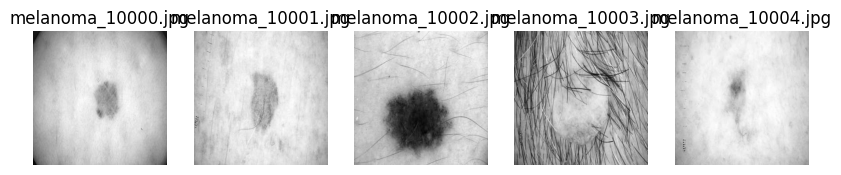

In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def count_and_convert_images_to_grayscale(directory):
    malignant_dir = os.path.join(directory, 'malignant')
    benign_dir = os.path.join(directory, 'benign')
    grayscale_dir = os.path.join(directory, 'grayscale')

    # Create directories for grayscale images of each category
    malignant_grayscale_dir = os.path.join(grayscale_dir, 'malignant')
    benign_grayscale_dir = os.path.join(grayscale_dir, 'benign')

    os.makedirs(malignant_grayscale_dir, exist_ok=True)
    os.makedirs(benign_grayscale_dir, exist_ok=True)

    # Initialize counts
    mode_counts = {
        "malignant": {"grayscale": 0, "RGB": 0},
        "benign": {"grayscale": 0, "RGB": 0}
    }

    # Function to process images in a given category
    def process_images(image_dir, category, grayscale_output_dir):
        for img_name in os.listdir(image_dir):
            img_path = os.path.join(image_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    # Count original mode
                    if img.mode == 'L':  # 'L' mode represents grayscale images
                        mode_counts[category]["grayscale"] += 1
                    elif img.mode == 'RGB':
                        mode_counts[category]["RGB"] += 1

                    # Convert to grayscale and save
                    grayscale_img = img.convert('L')  # Convert to grayscale
                    grayscale_img.save(os.path.join(grayscale_output_dir, img_name))

            except Exception as e:
                print(f"Error processing {img_name}: {e}")

    # Process malignant images
    process_images(malignant_dir, "malignant", malignant_grayscale_dir)

    # Process benign images
    process_images(benign_dir, "benign", benign_grayscale_dir)

    return mode_counts, malignant_grayscale_dir, benign_grayscale_dir

def show_sample_images(directory, num_samples=5):
    # Display a sample of images from the specified directory
    img_names = os.listdir(directory)[:num_samples]
    plt.figure(figsize=(10, 10))

    for i, img_name in enumerate(img_names):
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(img_name)

    plt.show()

# Path to your test directory
test_dir = r'C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\test'

# Process and convert images to grayscale for test data
test_image_mode_counts, malignant_grayscale_test_dir, benign_grayscale_test_dir = count_and_convert_images_to_grayscale(test_dir)

# Show sample images for malignant and benign categories in the test set
print("Sample Images from Test Set:")
show_sample_images(malignant_grayscale_test_dir)
show_sample_images(benign_grayscale_test_dir)


Normalization

In [59]:
import os
import numpy as np
from PIL import Image

def normalize_grayscale_images(directory):
    mode_counts = {"grayscale": 0, "RGB": 0}

    # Traverse the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        for img_name in files:
            img_path = os.path.join(root, img_name)

            # Check if the current item is a file and has a valid image extension
            if os.path.isfile(img_path) and img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    with Image.open(img_path) as img:
                        # Count original mode
                        if img.mode == 'L':
                            mode_counts["grayscale"] += 1
                        elif img.mode == 'RGB':
                            mode_counts["RGB"] += 1

                        # Normalize the image to the range [0, 1]
                        normalized_img = np.array(img) / 255.0  # Normalize pixel values

                        # Convert normalized image back to uint8 for saving
                        normalized_img_uint8 = (normalized_img * 255).astype(np.uint8)

                        # Save the normalized grayscale image, overwriting the original
                        normalized_image = Image.fromarray(normalized_img_uint8)
                        normalized_image.save(img_path)

                except Exception as e:
                    print(f"Error processing {img_name}: {e}")

    # Output mode counts
    print("Grayscale image mode counts:", mode_counts)
    return mode_counts

# Path to the main directory containing grayscale images
directory_path = r'C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\train\grayscale'
normalized_counts = normalize_grayscale_images(directory_path)


Grayscale image mode counts: {'grayscale': 9579, 'RGB': 0}


Data Augumentation

In [18]:
import os
import random
from PIL import Image

# Paths to the original data directories
train_dir = r"C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\train\grayscale"

# Directory to save augmented images
augmented_dir = r"C:\Users\91812\Downloads\archive (1) (1)\augmented_images"
benign_augmented_dir = os.path.join(augmented_dir, "benign")
malignant_augmented_dir = os.path.join(augmented_dir, "malignant")

# Create directories if they don't exist
os.makedirs(benign_augmented_dir, exist_ok=True)
os.makedirs(malignant_augmented_dir, exist_ok=True)

# Function to augment images and save to respective directories
def augment_and_save_images(input_dir, output_dir, num_augments=5):
    for img_name in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_name)
        if os.path.isfile(img_path) and img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                with Image.open(img_path) as img:
                    img = img.convert('L')  # Convert to grayscale
                    for i in range(num_augments):
                        augmented_img = img.copy()

                        # Random augmentations
                        angle = random.randint(0, 360)
                        augmented_img = augmented_img.rotate(angle)

                        if random.random() > 0.5:
                            augmented_img = augmented_img.transpose(Image.FLIP_LEFT_RIGHT)
                        if random.random() > 0.5:
                            augmented_img = augmented_img.transpose(Image.FLIP_TOP_BOTTOM)

                        augmented_img_name = f"{os.path.splitext(img_name)[0]}_aug_{i + 1}.jpg"
                        augmented_img.save(os.path.join(output_dir, augmented_img_name))

            except Exception as e:
                print(f"Error processing {img_name}: {e}")

# Loop over subdirectories (benign and malignant) within the 'train' directory
for category in ['benign', 'malignant']:
    category_dir = os.path.join(train_dir, category)
    if os.path.exists(category_dir):
        if category == 'benign':
            augment_and_save_images(category_dir, benign_augmented_dir)
        elif category == 'malignant':
            augment_and_save_images(category_dir, malignant_augmented_dir)


No of Augumented Images

In [19]:
import os

def count_images_in_directory(directory):
    total_images = 0
    for root, _, files in os.walk(directory):
        # Count images with common image extensions
        image_files = [file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
        total_images += len(image_files)
    return total_images

# Specify the path to the augmented dataset directory
augmented_directory = r'C:\Users\91812\Downloads\archive (1) (1)\augmented_images'

# Count the total images
total_images = count_images_in_directory(augmented_directory)
print(f"Total images in the augmented dataset: {total_images}")


Total images in the augmented dataset: 47895


CNN Model For Normal Dataset Without Duplicates

In [ ]:
pip install tensorflow==2.10.0


CNN Model For RGB Images

Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                    

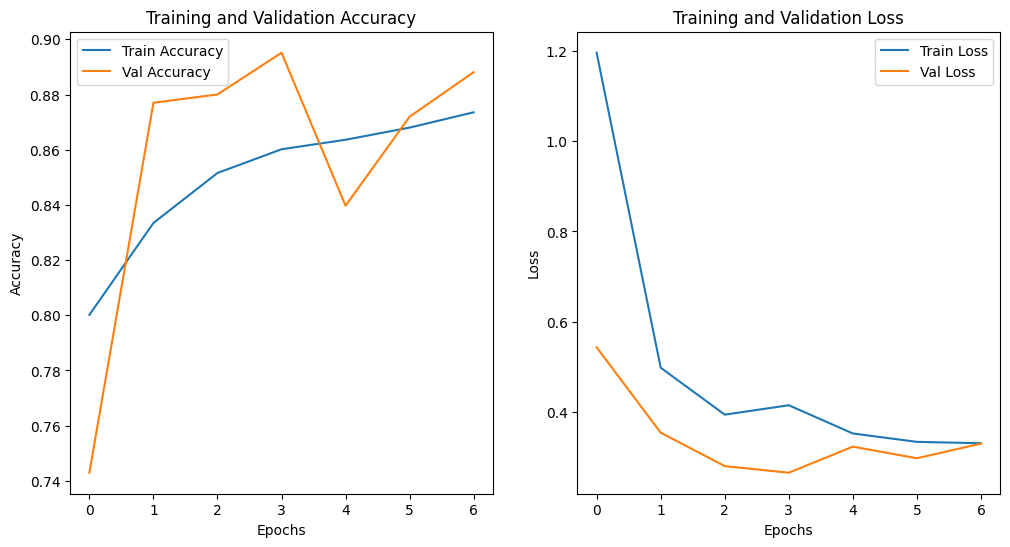

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths to the directories
train_dir = r"C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\train"
test_dir = r"C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\test"

# Initialize ImageDataGenerator for scaling pixel values with more augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,           # Add rotation to make the model learn harder
    width_shift_range=0.2,       # Add horizontal shift
    height_shift_range=0.2,      # Add vertical shift
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Zoom in and out
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Nearest interpolation to handle empty pixels after transformation
)

# Flow images from the training directory (for RGB images) with more augmentation
train_generator = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),      
    batch_size=32,
    class_mode='binary',        
    color_mode='rgb',           # Set to 'rgb' for RGB images
    shuffle=True
)

# Flow images from the test directory (for RGB images)
test_generator = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',           # Set to 'rgb' for RGB images
    shuffle=False
)

# Define a less complex CNN model (for RGB images) to reduce accuracy
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Reduced number of filters
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),   # Reduced number of units in dense layer
    layers.Dropout(0.7),                     # Increased dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Lowered learning rate
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']  
)

# Print the model summary
model.summary()

# Define callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)  # Reduced learning rate
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with fewer epochs and reduced complexity
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=7,                      # Reduced number of epochs to avoid overfitting
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping, lr_scheduler, checkpoint]
)

# Evaluate the model on test data
loss, accuracy, auc = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test AUC: {auc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Classification report for Unique RGB

In [35]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from the model
test_generator.reset()  # Reset the test generator to ensure we start from the beginning
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Convert the predictions to binary (0 or 1) based on a 0.5 threshold
predictions_binary = (predictions > 0.5).astype(int)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Generate the classification report
report1 = classification_report(true_labels, predictions_binary, target_names=test_generator.class_indices.keys())

# Print the classification report
print("Classification Report:")
print(report1)


32/32 [==============================] - 8s 235ms/step
Classification Report:
              precision    recall  f1-score   support

      benign       0.83      0.93      0.88       499
   malignant       0.92      0.82      0.87       500

    accuracy                           0.87       999
   macro avg       0.88      0.87      0.87       999
weighted avg       0.88      0.87      0.87       999



CNN Model For Grayscale Images

Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 batch_normalization_4 (Bat  (None, 148, 148, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_5 (Bat  (None, 72, 72, 128)       512       
 chNormalization)                    

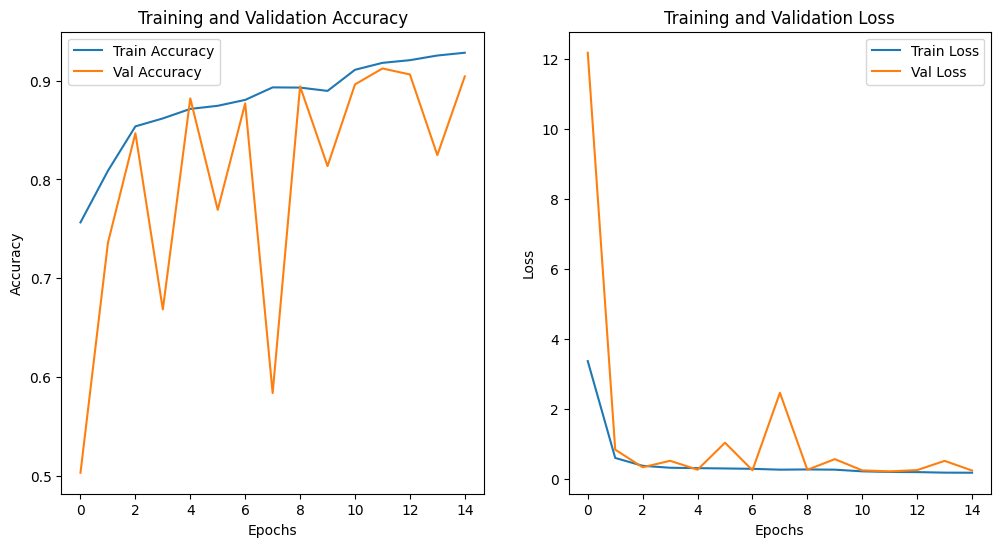

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths to the directories
train_dir = r"C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\grayscaletrain"
test_dir = r"C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\grayscaletest"

# Initialize ImageDataGenerator for scaling pixel values
datagen = ImageDataGenerator(rescale=1./255)

# Flow images from the training directory (for grayscale images)
train_generator = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),      
    batch_size=32,
    class_mode='binary',        
    color_mode='grayscale',     # Set to 'grayscale'
    shuffle=True
)

# Flow images from the test directory (for grayscale images)
test_generator = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',      
    shuffle=False
)

# Define an enhanced CNN model (for grayscale images)
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 1)),  # Updated input shape for grayscale
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']  
)

# Print the model summary
model.summary()

# Define callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)  # Corrected here
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with fewer epochs and increased learning rate
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping, lr_scheduler, checkpoint]
)

# Evaluate the model on test data
loss, accuracy, auc = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test AUC: {auc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Classification report for Grayscale

In [34]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from the model
test_generator.reset()  # Reset the test generator to ensure we start from the beginning
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Convert the predictions to binary (0 or 1) based on a 0.5 threshold
predictions_binary = (predictions > 0.5).astype(int)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Generate the classification report
report2 = classification_report(true_labels, predictions_binary, target_names=test_generator.class_indices.keys())

# Print the classification report
print("Classification Report:")
print(report2)


32/32 [==============================] - 9s 264ms/step
Classification Report:
              precision    recall  f1-score   support

      benign       0.85      0.94      0.89       499
   malignant       0.94      0.83      0.88       500

    accuracy                           0.89       999
   macro avg       0.89      0.89      0.89       999
weighted avg       0.89      0.89      0.89       999



CNN Model For Augmented GrayScaale Images

Found 47895 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      640       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 128)       512       
 chNormalization)                     

c:\Users\91812\anaconda3\envs\myEnv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1496/1496 [==============================] - 5309s 4s/step - loss: 0.5712 - accuracy: 0.7808 - auc: 0.8695 - val_loss: 0.4877 - val_accuracy: 0.7591 - val_auc: 0.9322 - lr: 0.0010
Epoch 2/25
1496/1496 [==============================] - 3432s 2s/step - loss: 0.3785 - accuracy: 0.8252 - auc: 0.9123 - val_loss: 0.3163 - val_accuracy: 0.8478 - val_auc: 0.9434 - lr: 0.0010
Epoch 3/25
1496/1496 [==============================] - 14472s 10s/step - loss: 0.3469 - accuracy: 0.8456 - auc: 0.9270 - val_loss: 0.4530 - val_accuracy: 0.7550 - val_auc: 0.9295 - lr: 0.0010
Epoch 4/25
1496/1496 [==============================] - 6026s 4s/step - loss: 0.3285 - accuracy: 0.8565 - auc: 0.9343 - val_loss: 1.4439 - val_accuracy: 0.6512 - val_auc: 0.8402 - lr: 0.0010
Epoch 5/25
1496/1496 [==============================] - 3810s 3s/step - loss: 0.3052 - accuracy: 0.8670 - auc: 0.9423 - val_loss: 3.4829 - val_accuracy: 0.4980 - val_auc: 0.5386 - lr: 0.0010
Epoch 6/25
1496/1496 [==============================] 

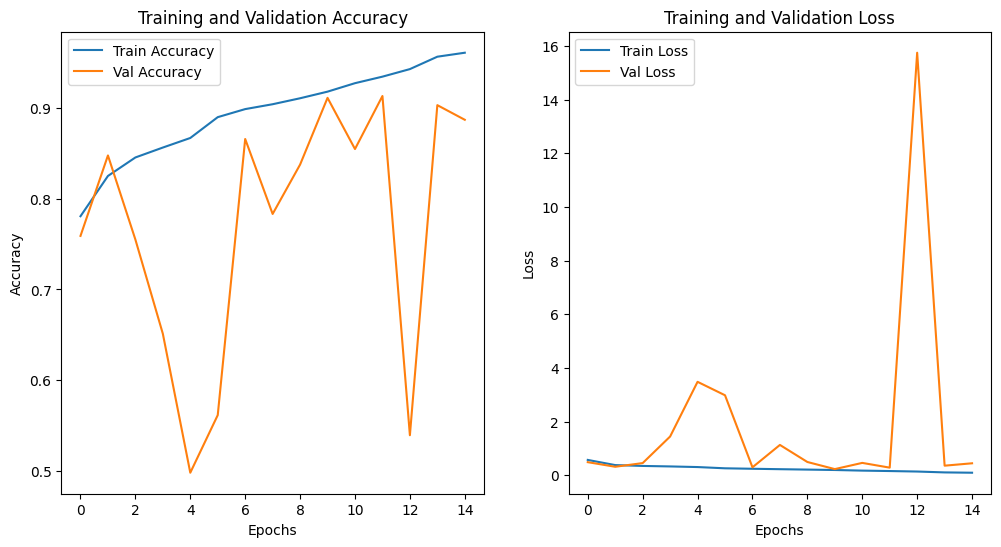

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths to the directories
train_dir = r"C:\Users\91812\Downloads\archive (1) (1)\augmented_images"
test_dir = r"C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\test"

# Initialize ImageDataGenerator for scaling pixel values
datagen = ImageDataGenerator(rescale=1./255)

# Flow images from the training directory (for grayscale images)
train_generator = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),      
    batch_size=32,
    class_mode='binary',        
    color_mode='grayscale',     # Set to 'grayscale'
    shuffle=True
)

# Flow images from the test directory (for grayscale images)
test_generator = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',      
    shuffle=False
)

# Define an enhanced CNN model (for grayscale images)
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 1)),  # Updated input shape for grayscale
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']  
)

# Print the model summary
model.summary()

# Define callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)  # Corrected here
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with fewer epochs and increased learning rate
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping, lr_scheduler, checkpoint]
)

# Evaluate the model on test data
loss, accuracy, auc = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test AUC: {auc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Classification report and Confusion Matrix for Augumented Grayscale images

32/32 [==============================] - 16s 485ms/step


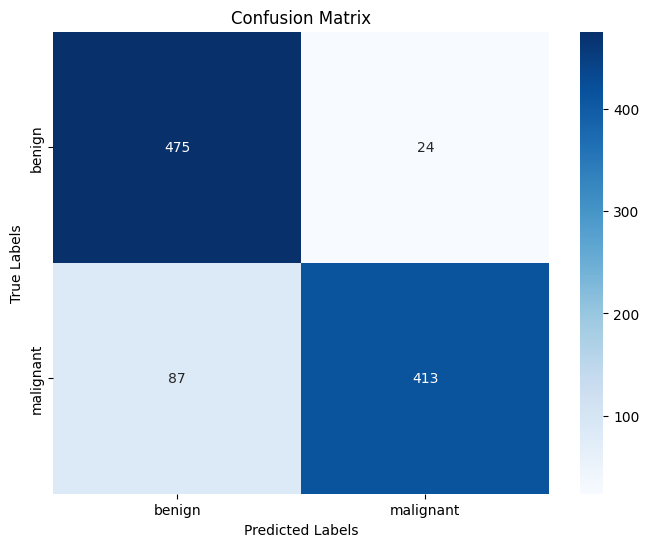

Classification Report:
              precision    recall  f1-score   support

      benign       0.85      0.95      0.90       499
   malignant       0.95      0.83      0.88       500

    accuracy                           0.89       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.89      0.89       999



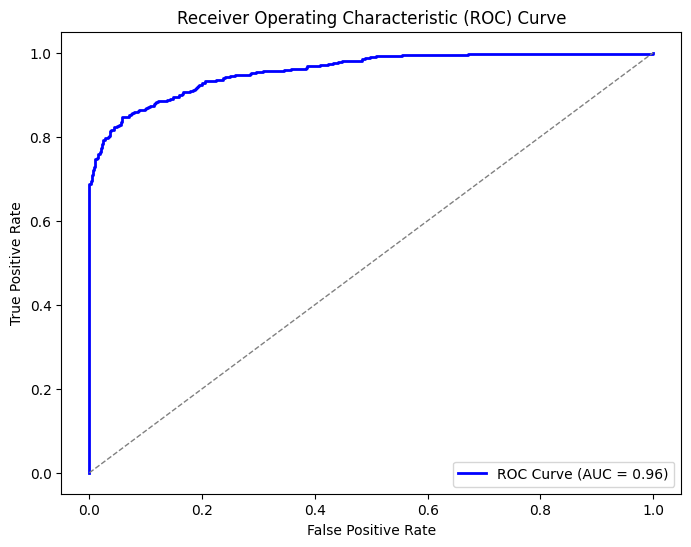

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns

# Generate predictions and true labels from the test data
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
y_true = test_generator.classes  # True labels from the test generator

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)  # Use raw probabilities for ROC curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


CNN Model for Augumented RGB Images

Found 47895 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                      

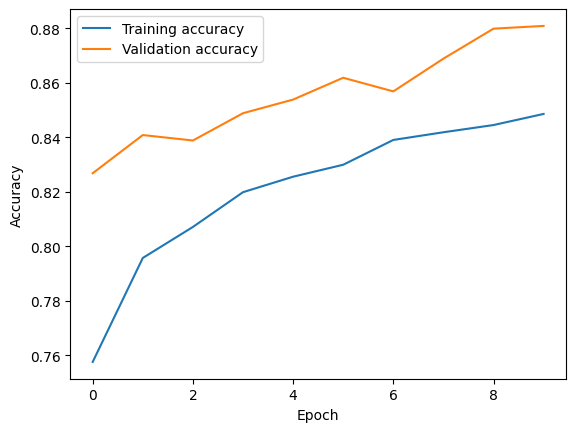

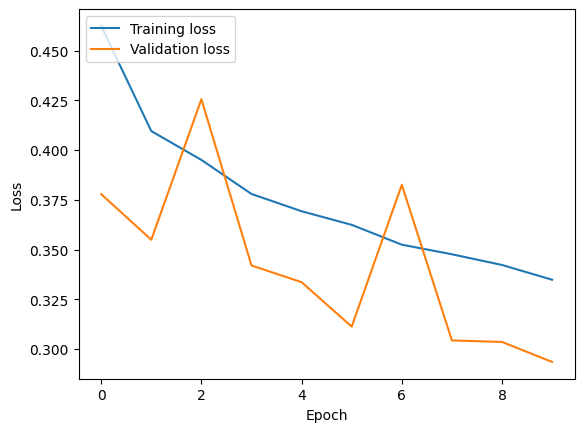

In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Set directories for training and testing datasets
train_dir = r'C:\Users\91812\Downloads\archive (1) (1)\augmented_imagesforrgb1'
test_dir = r'C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\test'

# Image data augmentation for training set (to reduce overfitting)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,        # Normalize pixel values
    rotation_range=20,        # Random rotations
    width_shift_range=0.2,    # Random horizontal shift
    height_shift_range=0.2,   # Random vertical shift
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'       # Fill missing pixels after transformations
)

# Image normalization for the test set (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Loading the training and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),     # Reduced image size to speed up training
    batch_size=32,
    class_mode='binary'       # Binary classification (benign or malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),     # Reduced image size to speed up training
    batch_size=32,
    class_mode='binary'       # Binary classification
)

# Define a simpler CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),       # Dropout layer to reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model for 10 epochs (reduce epochs to speed up)
history = model.fit(
    train_generator,
    epochs=10,  # Reduced epochs for faster training
    validation_data=test_generator
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

# Optional: Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Optional: Plot training & validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


Classification report for Augumented RGB Images

In [37]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from the model
test_generator.reset()  # Reset the test generator to ensure predictions start from the beginning
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Convert the predictions to binary (0 or 1) based on a 0.5 threshold
predictions_binary = (predictions > 0.5).astype(int)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Generate the classification report
report4 = classification_report(true_labels, predictions_binary, target_names=test_generator.class_indices.keys())

# Print the classification report
print("Classification Report:")
print(report4)


32/32 [==============================] - 7s 227ms/step
Classification Report:
              precision    recall  f1-score   support

      benign       0.85      0.94      0.90       499
   malignant       0.94      0.84      0.88       500

    accuracy                           0.89       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.89      0.89       999



VGG-16 Model for Augumented Grayscale Images

Found 47895 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Epoch 1/10
748/748 [==============================] - 4843s 6s/step - loss: 0.4281 - accuracy: 0.8069 - auc: 0.8861 - val_loss: 0.2953 - val_accuracy: 0.8865 - val_auc: 0.9540 - lr: 0.0010
Epoch 2/10
748/748 [==============================] - 4335s 6s/step - loss: 0.3662 - accuracy: 0.8311 - auc: 0.9146 - val_loss: 0.3233 - val_accuracy: 0.8567 - val_auc: 0.9449 - lr: 0.0010
Epoch 3/10
748/748 [==============================] - 4322s 6s/step - loss: 0.3606 - accuracy: 0.8333 - auc: 0.9171 - val_loss: 0.3194 - val_accuracy: 0.8674 - val_auc: 0.9462 - lr: 0.0010
Epoch 4/10
748/748 [==============================] - 4291s 6s/step - loss: 0.3534 - accuracy: 0.8378 - auc: 0.9208 - val_loss: 0.3127 - val_accuracy: 0.8599 - val_auc: 0.9430 - lr: 0.0010
Epoch 5/10
748/748 [==============================] - 4415s 6s/step - loss: 0.3250 - accuracy: 0.8547 - auc: 0.9340 - val_loss: 0.3020 - val_accuracy: 0.8674 - 

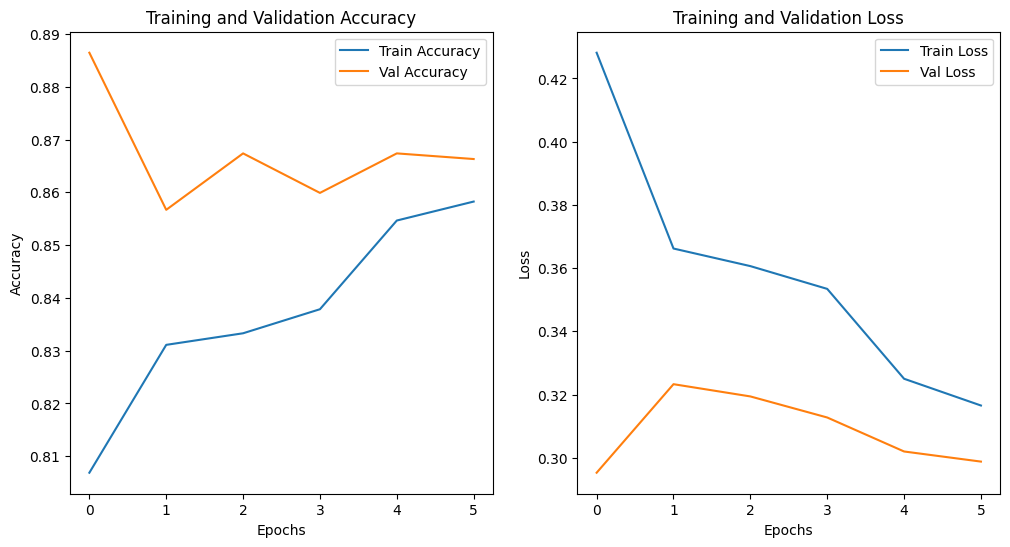

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths to the directories
train_dir = r"C:\Users\91812\Downloads\archive (1) (1)\augmented_images"
test_dir = r"C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\test"

# Initialize ImageDataGenerator for scaling pixel values
datagen = ImageDataGenerator(rescale=1./255)

# Flow images from the training directory
train_generator = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=64,  # Increased batch size for faster processing
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

# Flow images from the test directory
test_generator = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),
    batch_size=64,  # Increased batch size
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

# Convert grayscale images to RGB
def preprocess_to_rgb(generator):
    while True:
        x_batch, y_batch = next(generator)
        x_batch_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_batch))
        yield x_batch_rgb, y_batch

train_generator_rgb = preprocess_to_rgb(train_generator)
test_generator_rgb = preprocess_to_rgb(test_generator)

# Calculate steps explicitly
train_steps = train_generator.samples // train_generator.batch_size
test_steps = test_generator.samples // test_generator.batch_size

# Load the VGG-19 model pre-trained on ImageNet
vgg19_base = VGG19(
    weights='imagenet',
    include_top=False,  # Exclude the top classification layers
    input_shape=(150, 150, 3)  # RGB input shape
)

# Freeze the convolutional base
vgg19_base.trainable = False

# Define the model architecture
model = keras.Sequential([
    vgg19_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_model_vgg19.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator_rgb,
    steps_per_epoch=train_steps,
    epochs=10,
    validation_data=test_generator_rgb,
    validation_steps=test_steps,
    callbacks=[early_stopping, lr_scheduler, checkpoint]
)

# Evaluate the model
loss, accuracy, auc = model.evaluate(test_generator_rgb, steps=test_steps)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test AUC: {auc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Classification report for VGG-16 Model

In [45]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from the model
test_generator.reset()  # Reset the test generator to ensure predictions start from the beginning
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Convert the predictions to binary (0 or 1) based on a 0.5 threshold
predictions_binary = (predictions > 0.5).astype(int)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Generate the classification report
report5 = classification_report(true_labels, predictions_binary, target_names=test_generator.class_indices.keys())

# Print the classification report
print("Classification Report:")
print(report5)


32/32 [==============================] - 11s 322ms/step
Classification Report:
              precision    recall  f1-score   support

      benign       0.85      0.95      0.89       499
   malignant       0.94      0.83      0.88       500

    accuracy                           0.89       999
   macro avg       0.89      0.89      0.89       999
weighted avg       0.89      0.89      0.89       999



VGG-19 Model for Augumented Grayscale Images

Found 47895 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Epoch 1/10
749/749 [==============================] - ETA: 0s - loss: 0.4359 - accuracy: 0.8058 - auc: 0.8849
Epoch 1: val_loss improved from inf to 0.34948, saving model to best_model_vgg19.h5


c:\Users\91812\anaconda3\envs\myEnv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


749/749 [==============================] - 4983s 7s/step - loss: 0.4359 - accuracy: 0.8058 - auc: 0.8849 - val_loss: 0.3495 - val_accuracy: 0.8519 - val_auc: 0.9400 - lr: 0.0010
Epoch 2/10
749/749 [==============================] - ETA: 0s - loss: 0.3694 - accuracy: 0.8282 - auc: 0.9126
Epoch 2: val_loss improved from 0.34948 to 0.30643, saving model to best_model_vgg19.h5
749/749 [==============================] - 4924s 7s/step - loss: 0.3694 - accuracy: 0.8282 - auc: 0.9126 - val_loss: 0.3064 - val_accuracy: 0.8669 - val_auc: 0.9412 - lr: 0.0010
Epoch 3/10
749/749 [==============================] - ETA: 0s - loss: 0.3565 - accuracy: 0.8351 - auc: 0.9189
Epoch 3: val_loss did not improve from 0.30643
749/749 [==============================] - 5048s 7s/step - loss: 0.3565 - accuracy: 0.8351 - auc: 0.9189 - val_loss: 0.3393 - val_accuracy: 0.8599 - val_auc: 0.9438 - lr: 0.0010
Epoch 4/10
749/749 [==============================] - ETA: 0s - loss: 0.3501 - accuracy: 0.8393 - auc: 0.9221
E

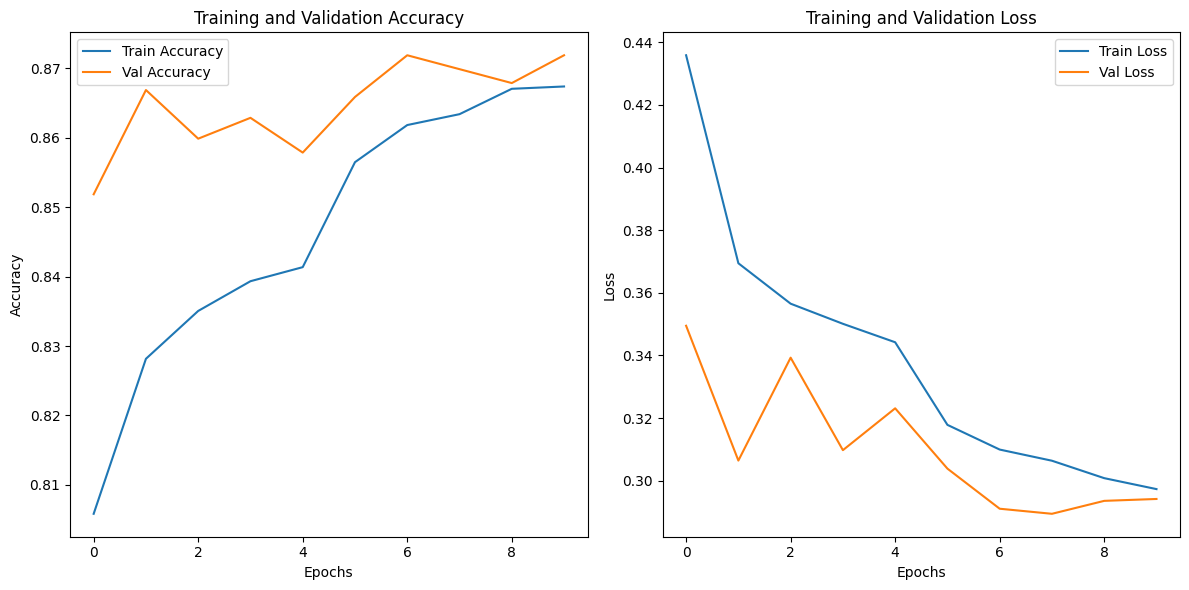

In [27]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths to the directories
train_dir = r"C:\Users\91812\Downloads\archive (1) (1)\augmented_images"
test_dir = r"C:\Users\91812\Downloads\archive (1) (1)\cleaned_melanoma_cancer_dataset\test"

# ImageDataGenerator for scaling and augmentation
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Training generator
train_generator = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

# Testing generator
test_generator = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

# Convert grayscale to RGB
def preprocess_to_rgb(generator):
    while True:
        x_batch, y_batch = next(generator)
        x_batch_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_batch))
        yield x_batch_rgb, y_batch

train_generator_rgb = preprocess_to_rgb(train_generator)
test_generator_rgb = preprocess_to_rgb(test_generator)

# Steps per epoch
train_steps = (train_generator.samples + train_generator.batch_size - 1) // train_generator.batch_size
test_steps = (test_generator.samples + test_generator.batch_size - 1) // test_generator.batch_size

# Load VGG-19 with pre-trained ImageNet weights
vgg19_base = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# Freeze the convolutional base
vgg19_base.trainable = False

# Model architecture
model = tf.keras.Sequential([
    vgg19_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model_vgg19.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_generator_rgb,
    steps_per_epoch=train_steps,
    epochs=10,
    validation_data=test_generator_rgb,
    validation_steps=test_steps,
    callbacks=[early_stopping, lr_scheduler, checkpoint]
)

# Evaluate the model
loss, accuracy, auc = model.evaluate(test_generator_rgb, steps=test_steps)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

# Plot training and validation metrics
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Classification report for VGG-19 Model

In [47]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from the model
test_generator.reset()  # Reset the test generator to ensure predictions start from the beginning
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Convert the predictions to binary (0 or 1) based on a 0.5 threshold
predictions_binary = (predictions > 0.5).astype(int)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Generate the classification report
report6 = classification_report(true_labels, predictions_binary, target_names=test_generator.class_indices.keys())

# Print the classification report
print("Classification Report:")
print(report6)


32/32 [==============================] - 11s 346ms/step
Classification Report:
              precision    recall  f1-score   support

      benign       0.85      0.94      0.89       499
   malignant       0.93      0.83      0.88       500

    accuracy                           0.88       999
   macro avg       0.89      0.88      0.88       999
weighted avg       0.89      0.88      0.88       999



Accuracy and Classification Report Of all 6 Models

Model Accuracy and F1 Score Comparison (Benign and Malignant Classes)
   S.No           Model             Accuracy (%)  Benign F1 Score  Malignant F1 Score
0    1            Unique RGB model      88.48          0.88               0.87       
1    2      Unique Grayscale model      89.88          0.89               0.88       
2    3   Grayscale Augmented model      90.29          0.90               0.88       
3    4         RGB Augmented model      87.00          0.90               0.88       
4    5                 VGG16 model      86.74          0.88               0.89       
5    6                 VGG19 model      87.19          0.89               0.88       


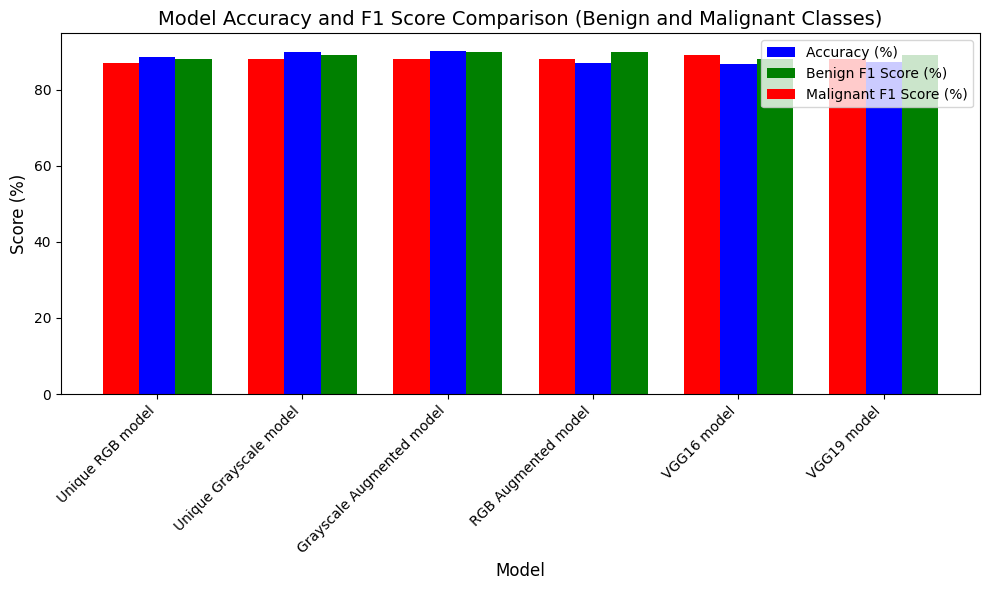

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Example F1 scores for both classes: [benign_f1, malignant_f1]
f1_scores_benign = [0.88, 0.89, 0.90, 0.90, 0.88, 0.89]  # Benign class F1 scores
f1_scores_malignant = [0.87, 0.88, 0.88, 0.88, 0.89, 0.88]  # Malignant class F1 scores

# Creating the DataFrame
data = {
    "S.No": [1, 2, 3, 4, 5, 6],
    "Model": [
        "Unique RGB model",
        "Unique Grayscale model",
        "Grayscale Augmented model",
        "RGB Augmented model",
        "VGG16 model",
        "VGG19 model"
    ],
    "Accuracy (%)": [88.48, 89.88, 90.29, 87.00, 86.74, 87.19],
    "Benign F1 Score": f1_scores_benign,  # Benign class F1 scores
    "Malignant F1 Score": f1_scores_malignant  # Malignant class F1 scores
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Rounding the numerical columns
df["Accuracy (%)"] = df["Accuracy (%)"].round(2)
df["Benign F1 Score"] = df["Benign F1 Score"].round(2)
df["Malignant F1 Score"] = df["Malignant F1 Score"].round(2)

# Adjust display settings for better alignment
pd.set_option("display.colheader_justify", "center")
pd.set_option("display.width", 1000)

# Displaying the DataFrame
print("Model Accuracy and F1 Score Comparison (Benign and Malignant Classes)")
print(df)

# Plotting the combined bar graph for Accuracy, Benign F1, and Malignant F1 scores
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions of the bars
x = range(len(df))

# Width for the bars
width = 0.25

# Bar plot for Accuracy and F1 Scores for Benign and Malignant Classes
ax.bar(x, df["Accuracy (%)"], width=width, label="Accuracy (%)", align='center', color='b')
ax.bar([p + width for p in x], df["Benign F1 Score"] * 100, width=width, label="Benign F1 Score (%)", align='center', color='g')
ax.bar([p - width for p in x], df["Malignant F1 Score"] * 100, width=width, label="Malignant F1 Score (%)", align='center', color='r')

# Add labels and title
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Model Accuracy and F1 Score Comparison (Benign and Malignant Classes)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=45, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


Among all the models evaluated, the CNN for Augumented Grayscale model demonstrated the highest accuracy and F1 score for both classes, making it the optimal choice for further development in a skin cancer detection application. Additionally, using the CNN for Augumented Grayscale model will provide enhanced image classification capabilities, ensuring more accurate results compared to other models.

Classification report and Confusion Matrix for Augumented Grayscale images


32/32 [==============================] - 10s 315ms/step


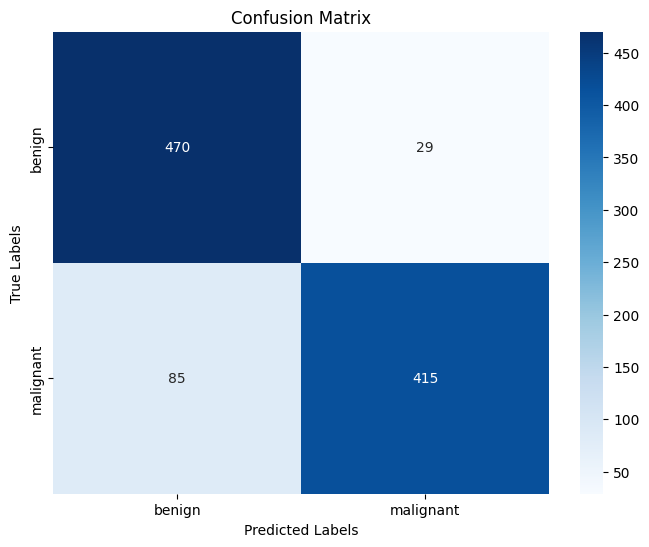

Classification Report:
              precision    recall  f1-score   support

      benign       0.85      0.94      0.89       499
   malignant       0.93      0.83      0.88       500

    accuracy                           0.89       999
   macro avg       0.89      0.89      0.89       999
weighted avg       0.89      0.89      0.89       999



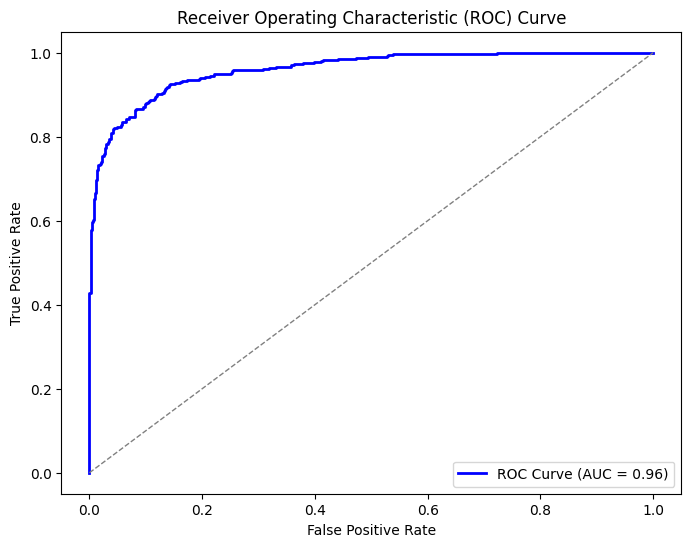

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns

# Generate predictions and true labels from the test data
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
y_true = test_generator.classes  # True labels from the test generator

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)  # Use raw probabilities for ROC curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


THANK  YOU